<a href="https://colab.research.google.com/github/tuba89/titanic_passenger/blob/main/titanic_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
# libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [264]:
# load titanic DataSet
titanic_df = pd.read_csv('/content/titanic-passengers.csv', sep=";")
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


# **1- Preprocessing part**

In [265]:
# Cabin feature is useless & contain null values
# so ==> dropping the useless column
titanic_df.drop('Cabin',axis=1, inplace=True)

In [266]:
# notes
# PassengerId = id of each passenger (not important)
# Survived = target (1= survived, 0 = not survived)
# Pclass = class of pessengers (1,2 & 3)
# Age = it's important feature (contain null values) ==> replace them with the mean or mode

In [267]:
# fill the Nan values in Age feature
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S


In [268]:
# Count 
print(titanic_df.groupby(['Embarked'])['PassengerId'].count())

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


In [269]:
# fill nan embarked by 's' most relevent 
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Embarked'].isnull().sum()

0

In [270]:
# check empties/nan
titanic_df.isnull().values.any()
# False no null value

False

In [271]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [272]:
# Drop 'Ticket', 'PassengerId' columns => useless features
titanic_df = titanic_df.drop(columns=['Ticket', 'PassengerId'])

In [273]:
# replace survived by 0 = no, 1 = yes
titanic_df["Survived"] = titanic_df["Survived"].map({"Yes":1, "No":0})

In [274]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [275]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **2. Visualization part**

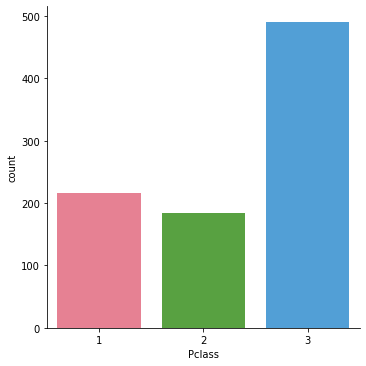

In [276]:
# visualitation of class
sns.catplot(x="Pclass", data=titanic_df, 
               kind="count",
               palette="husl")


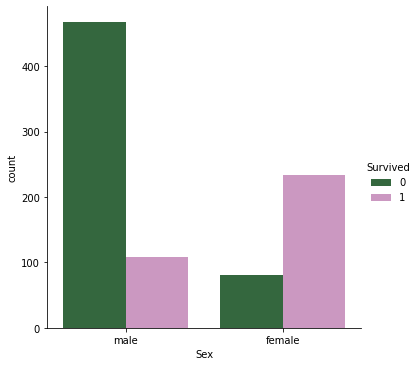

In [277]:
# count male/female entries up 

sns.catplot(x="Sex", data=titanic_df, kind="count",
               hue="Survived", palette="cubehelix")

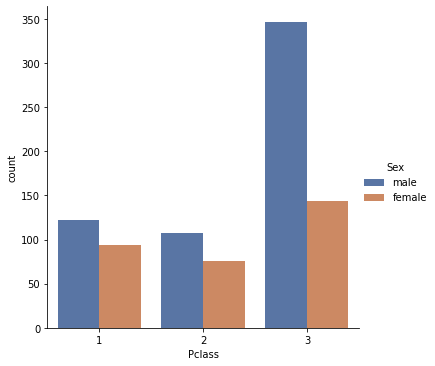

In [278]:
sns.catplot(x="Pclass", data=titanic_df, 
               hue="Sex",
               kind="count", palette="deep")

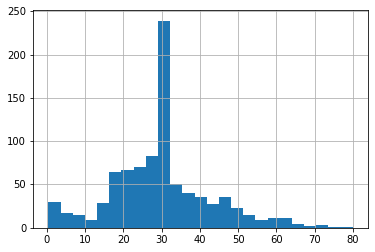

In [279]:
#  calculate the histogram of the age

titanic_df['Age'].hist(bins=25)

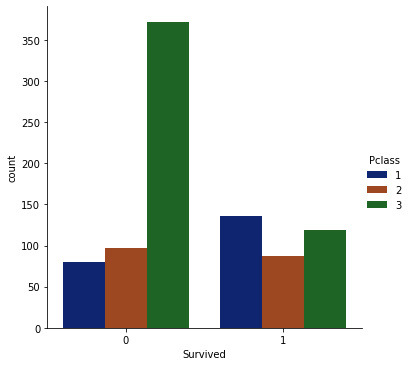

In [280]:
# survived or not by class
sns.catplot(x="Survived", data=titanic_df, 
               kind="count", palette="dark", hue='Pclass')

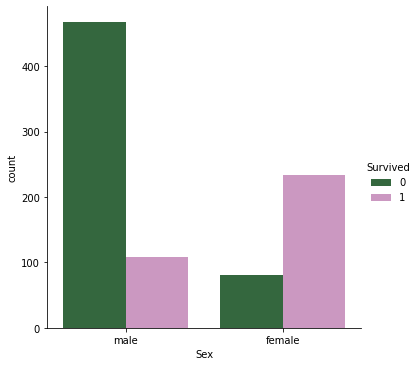

In [281]:
# survived or not by Gender
sns.catplot(x="Sex", data=titanic_df, kind="count",
               hue="Survived", palette="cubehelix")


* Visualize the correlation between "Sex" & "Age" in a plot of your choosing. 



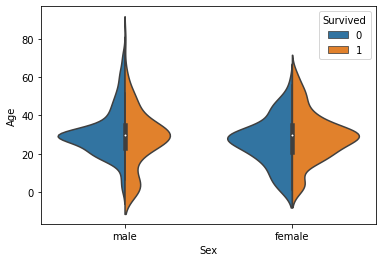

In [282]:
#sex & age /survived or not
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = titanic_df, split = True) 

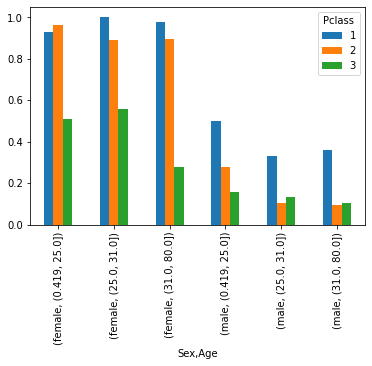

In [283]:
# Gender & Age intervals (parapport class)
age_intervals = pd.qcut(titanic_df['Age'], 3)
titanic_df.pivot_table('Survived', 
                       ['Sex', age_intervals], 
                       'Pclass').plot(kind='bar')

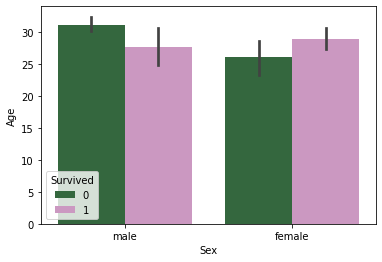

In [284]:
# Gender & Age  
# 1 = survivded, 0  = not survived
sns.barplot(x='Sex', y='Age', 
               hue='Survived', 
               data=titanic_df,
            palette="cubehelix")

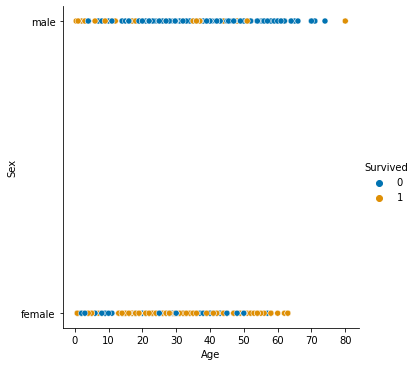

In [285]:
sns.relplot(x="Age", y="Sex", data=titanic_df, hue="Survived", 
            palette="colorblind")

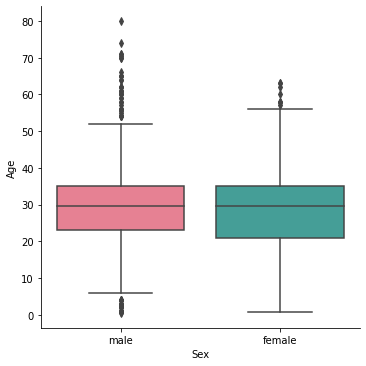

In [286]:
# visualize Age vs Sex using box plot
sns.catplot(y="Age", x="Sex", data = titanic_df, kind="box", palette='husl')

* -Sibsp & survived 

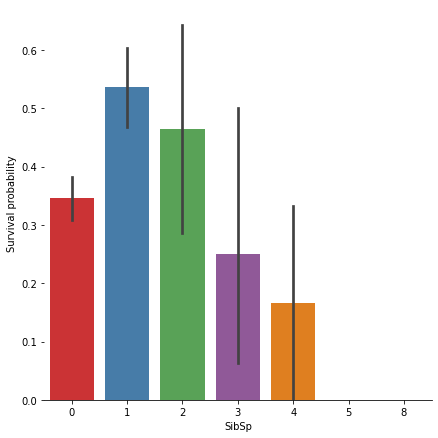

In [287]:
# Exploring SibSp feature / Survived

Sib_Survi = sns.catplot(x="SibSp",y="Survived",data=titanic_df,
                   kind="bar", height = 6 , palette = "Set1")

Sib_Survi.despine(left=True)
Sib_Survi = Sib_Survi.set_ylabels("Survival probability")
# passengers have a lot of siblings/spouses ==> have less chance to survive. 
# less SibSP ==> more chance to survive.

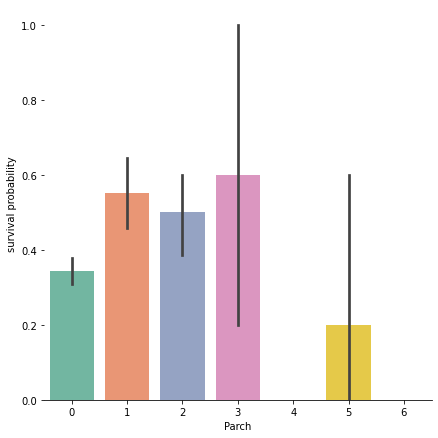

In [288]:
# Parch / Survived
parch_survi = sns.catplot(x="Parch",y="Survived",data=titanic_df, 
                         kind="bar", height = 6 , palette = "Set2")

parch_survi.despine(left=True)
parch_survi = parch_survi.set_ylabels("survival probability")
# Small families have more chance to survive, more than single

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


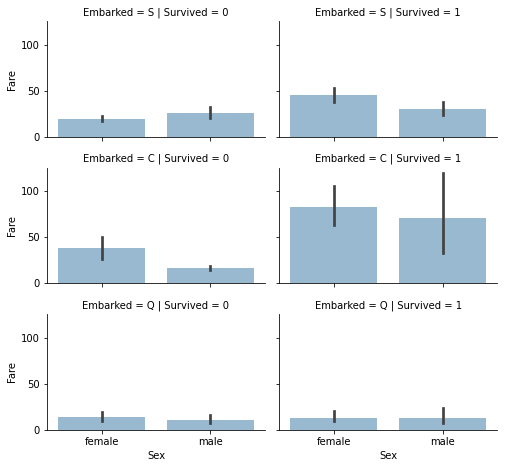

In [313]:
# Embarked / fare / sex // survival prob
grid = sns.FacetGrid(titanic_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()


* Have a look at this function:

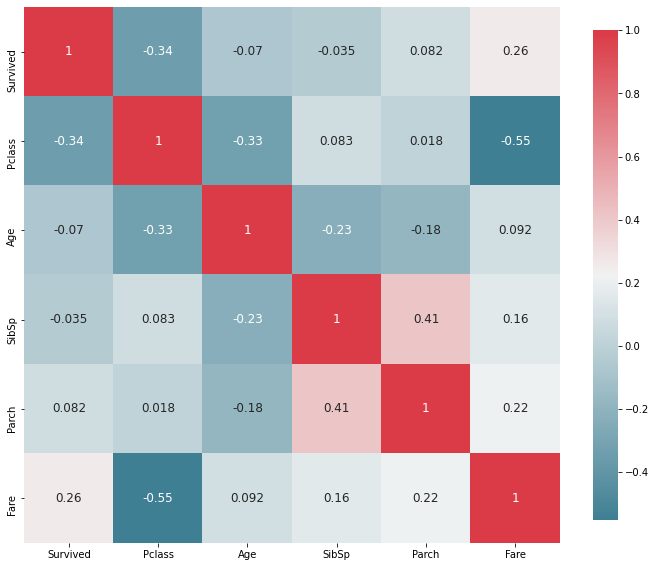

In [290]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap,square=True, 
                    cbar_kws={ 'shrink' : .9 }, 
                    ax=ax, 
                    annot = True, 
                    annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(titanic_df )

**** -write a paragraph describing analysis***

In [291]:
''' 
- There are no very highly correlated columns:

- Only Fare feature seems to have a significative correlation with survived = 0.26.
- Fare is negatively correlated with Pclass at -0.34.
- Fare is negatively correlated with Pclass at -0.55.

'''

' \n- There are no very highly correlated columns:\n\n- Only Fare feature seems to have a significative correlation with survived = 0.26.\n- Fare is negatively correlated with Pclass at -0.34.\n- Fare is negatively correlated with Pclass at -0.55.\n\n'

*** * relation between Pclass and survived ***

In [292]:
# Use the groupby function combined with the mean() 
# to view the relation between Pclass and survived

titanic_df[["Pclass","Survived"]].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [293]:
# extract the title from the column Names
titanic_df['Title'] = titanic_df['Name'].apply(lambda full_name: full_name.split(', ')[1].split('.')[0])
titanic_df.tail(30)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,Mr
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,Mr


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


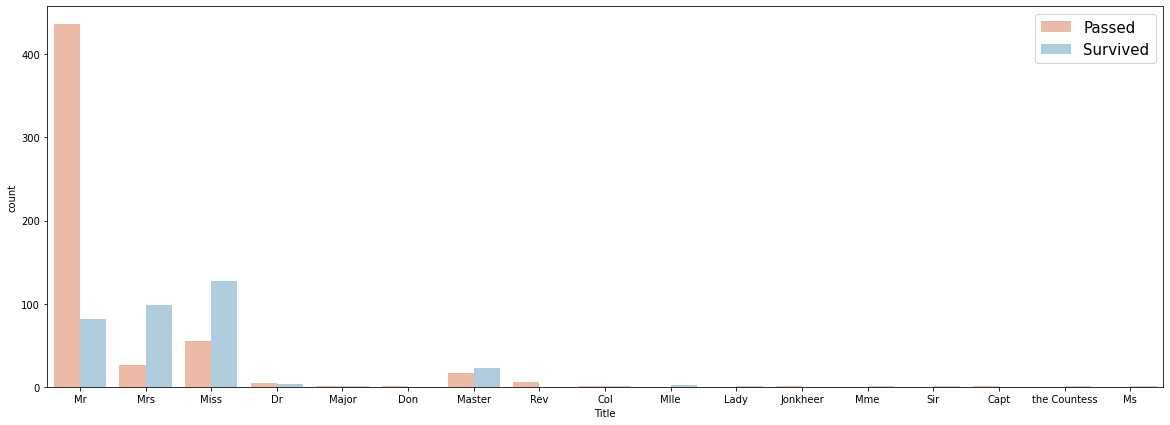

In [294]:
# Visualize TITLE & survived
plt.figure(figsize=(20,7))
sns.countplot('Title',data=titanic_df, hue='Survived', palette="RdBu")
plt.legend(['Passed','Survived'], loc='upper right', prop={'size':15})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


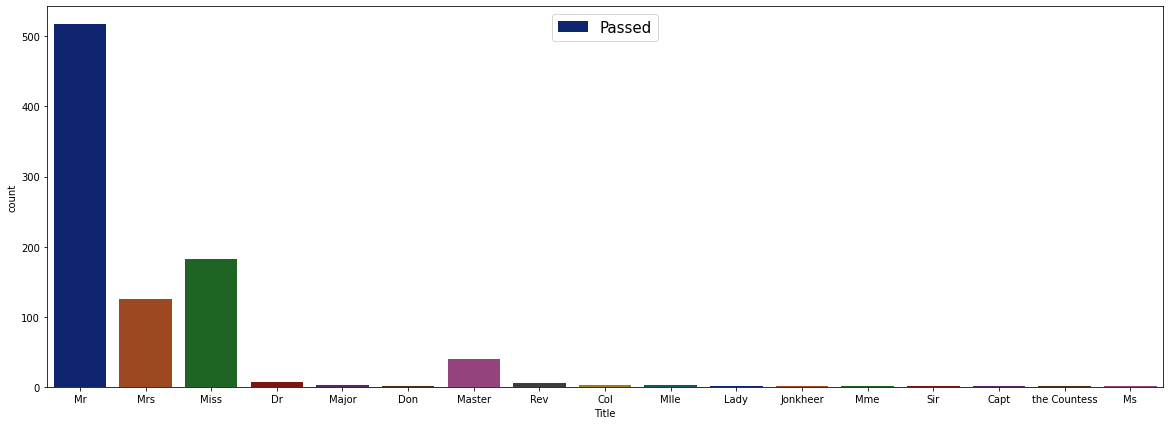

In [295]:
# Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)
plt.figure(figsize=(20,7))
sns.countplot('Title',data=titanic_df, palette="dark")
plt.legend(['Passed','Survived'], loc='upper center', prop={'size':15})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


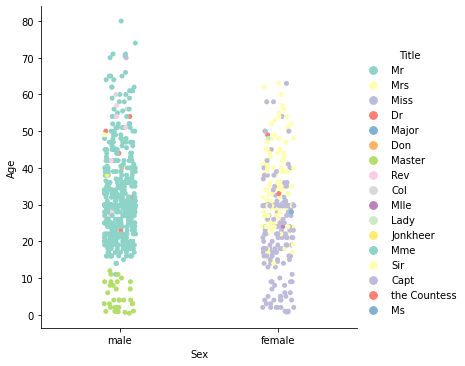

In [296]:
sns.catplot('Sex', 'Age', 
               hue='Title', 
               data=titanic_df,
            palette="Set3")

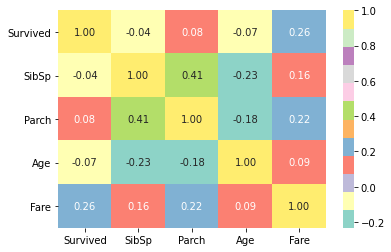

In [297]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
corr_numeric = sns.heatmap(titanic_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),
                           annot=True, fmt = ".2f", cmap = "Set3")

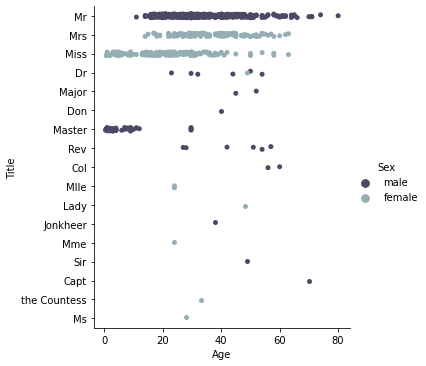

In [298]:
sns.catplot(x='Age', y='Title', 
               hue='Sex', 
               data=titanic_df,
            palette="bone")

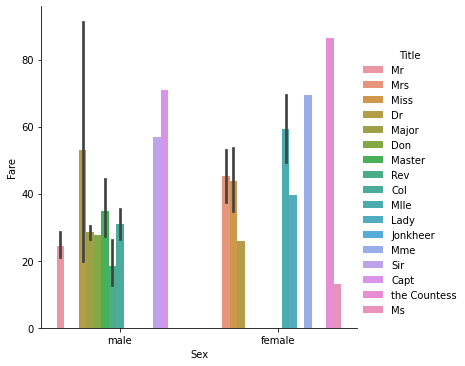

In [299]:
sns.catplot(x="Sex", y="Fare", hue="Title", kind="bar", data=titanic_df)

In [300]:
# replace the title
titanic_df['Title'] = titanic_df['Title'].replace(['Capt', 'Col', 'Major', 'Dr','Rev'], 'Officer')
titanic_df['Title'] = titanic_df['Title'].replace(['Jonkheer','Don','Sir','Lady','the Countess','Dona'], 'Royalty')
titanic_df['Title'] = titanic_df['Title'].replace(['Ms','Mrs','Mr'], 'Mrs')
titanic_df['Title'] = titanic_df['Title'].replace(['Mme', 'Mlle', 'Miss'], 'Miss')

Text(0, 0.5, 'Passenger count')

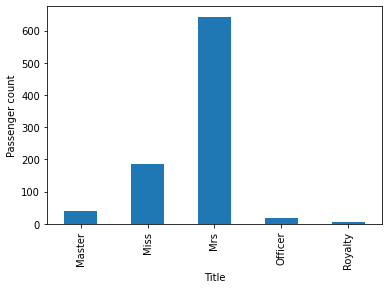

In [301]:
# plotting
plt = titanic_df.Title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

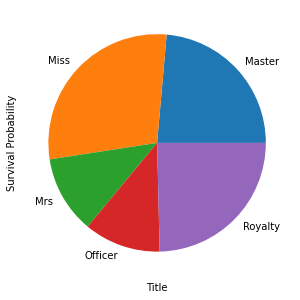

In [302]:
plt = titanic_df[['Title', 'Survived']].groupby('Title').mean().Survived.plot.pie(y='mass', figsize=(5, 5))
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

In [303]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,Mrs
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,Mrs


In [304]:
# drop Name feature (useless)
titanic_df.drop('Name',axis=1, inplace=True)

In [305]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.0,0,0,13.0000,S,Mrs
1,0,3,male,25.0,0,0,7.6500,S,Mrs
2,0,3,male,20.0,0,0,7.8542,S,Mrs
3,0,3,female,29.0,0,4,21.0750,S,Mrs
4,0,1,male,31.0,1,0,52.0000,S,Mrs




*   Create new feature FamilySize



In [306]:
# use the Parch and the SibSp columns
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,0,0,13.0000,S,Mrs,1
1,0,3,male,25.0,0,0,7.6500,S,Mrs,1
2,0,3,male,20.0,0,0,7.8542,S,Mrs,1
3,0,3,female,29.0,0,4,21.0750,S,Mrs,5
4,0,1,male,31.0,1,0,52.0000,S,Mrs,2


In [307]:
# drop siblinks/spouse (SibSp)
titanic_df.drop('SibSp',axis=1, inplace=True)

In [308]:
# drop parent/child (Parch)
titanic_df.drop('Parch',axis=1, inplace=True)

In [309]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,13.0000,S,Mrs,1
1,0,3,male,25.0,7.6500,S,Mrs,1
2,0,3,male,20.0,7.8542,S,Mrs,1
3,0,3,female,29.0,21.0750,S,Mrs,5
4,0,1,male,31.0,52.0000,S,Mrs,2


In [310]:
# Use what you have learned so far to conclude if this feature is useful or not.
''' 
it is not useful, because :
    - there is categorical data
    - whitch means = conveting features ==> "Sex", "Embarked",& "Title" 
        to numerical values
'''

' \nit is not useful, because :\n    - there is categorical data\n    - whitch means = conveting features ==> "Sex", "Embarked",& "Title" \n        to numerical values\n'